# スプリント23 ゲート付きリカレントニューラルネットワーク

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#このSprintについて" data-toc-modified-id="このSprintについて-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>このSprintについて</a></span><ul class="toc-item"><li><span><a href="#Sprintの目的" data-toc-modified-id="Sprintの目的-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Sprintの目的</a></span></li><li><span><a href="#どのように学ぶか" data-toc-modified-id="どのように学ぶか-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>どのように学ぶか</a></span></li></ul></li><li><span><a href="#KerasのRecurrentレイヤー" data-toc-modified-id="KerasのRecurrentレイヤー-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>KerasのRecurrentレイヤー</a></span><ul class="toc-item"><li><span><a href="#【問題1】各種手法の実行" data-toc-modified-id="【問題1】各種手法の実行-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>【問題1】各種手法の実行</a></span><ul class="toc-item"><li><span><a href="#LSTM" data-toc-modified-id="LSTM-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>LSTM</a></span></li><li><span><a href="#SimpleRNN" data-toc-modified-id="SimpleRNN-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>SimpleRNN</a></span></li><li><span><a href="#GRU" data-toc-modified-id="GRU-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>GRU</a></span></li><li><span><a href="#ConvLSTM2D" data-toc-modified-id="ConvLSTM2D-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>ConvLSTM2D</a></span></li></ul></li><li><span><a href="#【問題2】（アドバンス課題）複数のデータセット間での比較" data-toc-modified-id="【問題2】（アドバンス課題）複数のデータセット間での比較-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>【問題2】（アドバンス課題）複数のデータセット間での比較</a></span></li><li><span><a href="#【問題3】他のクラスの説明" data-toc-modified-id="【問題3】他のクラスの説明-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>【問題3】他のクラスの説明</a></span></li></ul></li></ul></div>

## このSprintについて

### Sprintの目的
* 発展的なRNNの手法を理解する
* ドキュメントを網羅的に読む

### どのように学ぶか
Kerasに用意されているRNN関係のレイヤーを動作させながら学んでいきます。

## KerasのRecurrentレイヤー


Kerasには複数のRecurrentレイヤーや、それに関連したクラスが用意されています。今回のSprintではこれら全てを動かした上で、それぞれの役割を説明できる状態を目指します。

以下のドキュメントにまとめられています。

Recurrentレイヤー - Keras Documentation  
https://keras.io/ja/layers/recurrent/

### 【問題1】各種手法の実行
Kerasには4種類のReccurentレイヤーが用意されています。SimpleRNN以外はゲート付きリカレントニューラルネットワークです。

* SimpleRNN
* GRU
* LSTM
* ConvLSTM2D

これらを実行してください。この中でSimpleRNN、GRU、LSTMは同様のタスクに用いることができるため、精度の比較も行なってください。

Keras公式のサンプルコードを利用してください。

LSTMのサンプルコード

keras-apache-mxnet/imdb_lstm.py at master · awslabs/keras-apache-mxnet  
https://github.com/awslabs/keras-apache-mxnet/blob/master/examples/imdb_lstm.py

ConvLSTM2Dのサンプルコード

keras-apache-mxnet/conv_lstm.py at master · awslabs/keras-apache-mxnet  
https://github.com/awslabs/keras-apache-mxnet/blob/master/examples/conv_lstm.py

このサンプルコードをそのまま使う必要はなく、ノード数やエポックなどは変更して構いません。全て実行する上での実行時間を考慮した数に設定してください。

#### LSTM

In [1]:
'''Trains an LSTM model on the IMDB sentiment classification task.
The dataset is actually too small for LSTM to be of any advantage
compared to simpler, much faster methods such as TF-IDF + LogReg.
# Notes
- RNNs are tricky. Choice of batch size is important,
choice of loss and optimizer is critical, etc.
Some configurations won't converge.
- LSTM loss decrease patterns during training can be quite different
from what you see with CNNs/MLPs/etc.
'''
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
from keras import backend as K

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()

model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))

score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
17465344/17464789 [==============================] - 3s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Epoch 1/15
782/782 [==============================] - 394s 504ms/step - loss: 0.4316 - accuracy: 0.7962 - val_loss: 0.3937 - val_accuracy: 0.8240
Epoch 2/15
782/782 [==============================] - 389s 497ms/step - loss: 0.2525 - accuracy: 0.9003 - val_loss: 0.3970 - val_accuracy: 0.8336
Epoch 3/15
782/782 [==============================] - 381s 488ms/step - loss: 0.1614 - accuracy: 0.9392 - val_loss: 0.4567 - val_accuracy: 0.8234
Epoch 4/15
782/782 [==============================] - 374s 478ms/step - loss: 0.1049 - accuracy: 0.9632 - val_loss: 0.5155 - val_accuracy: 0.8240
Epoch 5/15
782/782 [==============================] - 367s 469ms/step - loss: 0.0672 - accuracy: 0.9769 - val_loss: 0.5964 - val_accuracy: 0.8215
Epoch 6/15
782/782 [==================

In [2]:
from keras.layers import SimpleRNN
from keras.layers import GRU
from keras.layers import ConvLSTM2D

#### SimpleRNN

In [3]:
max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

'''
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
'''

print('Build model...')
model = Sequential()

model.add(Embedding(max_features, 128))
model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))

score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)

print('Test score:', score)
print('Test accuracy:', acc)

Build model...
Train...
Epoch 1/15
782/782 [==============================] - 64s 82ms/step - loss: 0.6913 - accuracy: 0.5422 - val_loss: 0.6557 - val_accuracy: 0.6174
Epoch 2/15
782/782 [==============================] - 60s 77ms/step - loss: 0.6043 - accuracy: 0.6647 - val_loss: 0.6015 - val_accuracy: 0.6708
Epoch 3/15
782/782 [==============================] - 68s 87ms/step - loss: 0.5784 - accuracy: 0.6908 - val_loss: 0.5821 - val_accuracy: 0.6941
Epoch 4/15
782/782 [==============================] - 61s 78ms/step - loss: 0.4935 - accuracy: 0.7636 - val_loss: 0.5718 - val_accuracy: 0.6862
Epoch 5/15
782/782 [==============================] - 71s 91ms/step - loss: 0.4689 - accuracy: 0.7815 - val_loss: 0.7706 - val_accuracy: 0.6758
Epoch 6/15
782/782 [==============================] - 66s 85ms/step - loss: 0.4373 - accuracy: 0.8028 - val_loss: 0.5274 - val_accuracy: 0.7349
Epoch 7/15
782/782 [==============================] - 68s 87ms/step - loss: 0.4618 - accuracy: 0.7826 - val_loss

#### GRU

In [4]:
max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

'''
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
'''

print('Build model...')
model = Sequential()

model.add(Embedding(max_features, 128))
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))

score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)

print('Test score:', score)
print('Test accuracy:', acc)

Build model...
Train...
Epoch 1/15
782/782 [==============================] - 240s 306ms/step - loss: 0.4430 - accuracy: 0.7864 - val_loss: 0.3529 - val_accuracy: 0.8446
Epoch 2/15
782/782 [==============================] - 243s 311ms/step - loss: 0.2482 - accuracy: 0.9030 - val_loss: 0.3476 - val_accuracy: 0.8478
Epoch 3/15
782/782 [==============================] - 252s 322ms/step - loss: 0.1447 - accuracy: 0.9467 - val_loss: 0.4287 - val_accuracy: 0.8369
Epoch 4/15
782/782 [==============================] - 228s 291ms/step - loss: 0.0799 - accuracy: 0.9721 - val_loss: 0.5324 - val_accuracy: 0.8259
Epoch 5/15
782/782 [==============================] - 252s 322ms/step - loss: 0.0449 - accuracy: 0.9846 - val_loss: 0.6749 - val_accuracy: 0.8229
Epoch 6/15
782/782 [==============================] - 250s 319ms/step - loss: 0.0246 - accuracy: 0.9921 - val_loss: 0.8018 - val_accuracy: 0.8194
Epoch 7/15
782/782 [==============================] - 266s 340ms/step - loss: 0.0169 - accuracy: 0.9

* 3つのモデルを同じepoch数で学習し、精度を比較した。いずれも過学習しているのでearly stoppingは行った方が良い。15epoch後の精度で見れば、LSTM,GRUはSimpleRNNよりも1割ほど精度が高い。

#### ConvLSTM2D

Epoch 1/3
95/95 [==============================] - 2547s 27s/step - loss: 0.8707 - val_loss: 0.6929
Epoch 2/3
95/95 [==============================] - 2458s 26s/step - loss: 0.7756 - val_loss: 0.6982
Epoch 3/3
95/95 [==============================] - 2415s 25s/step - loss: 0.7207 - val_loss: 0.6932


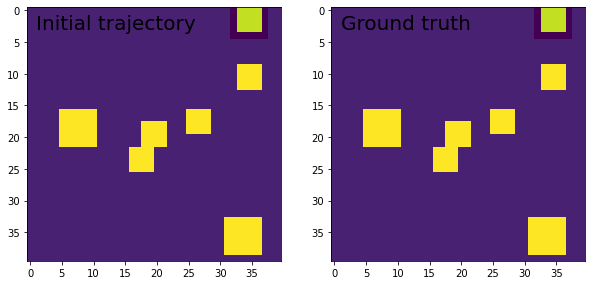

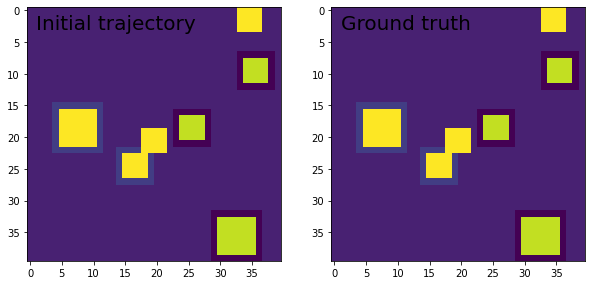

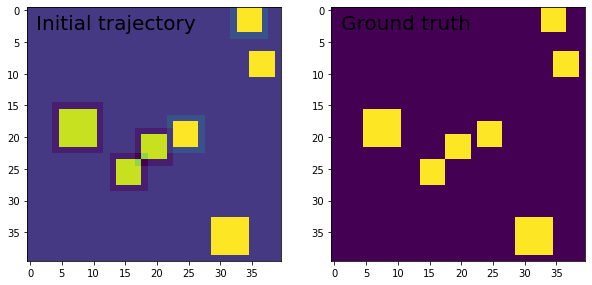

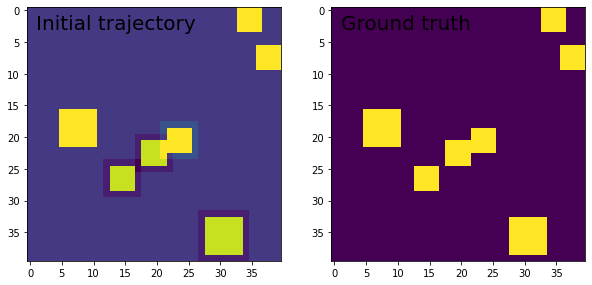

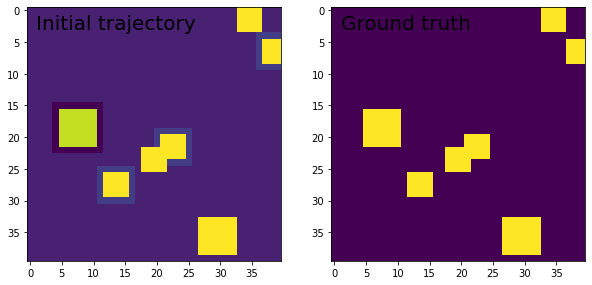

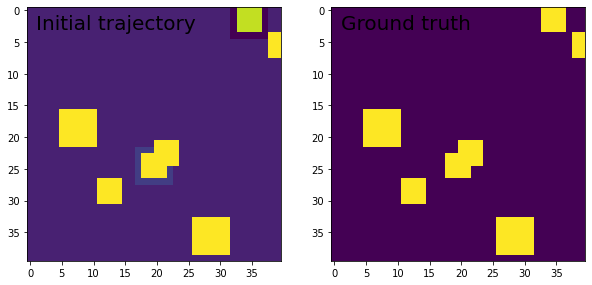

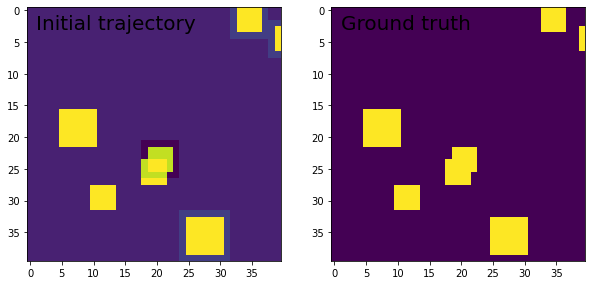

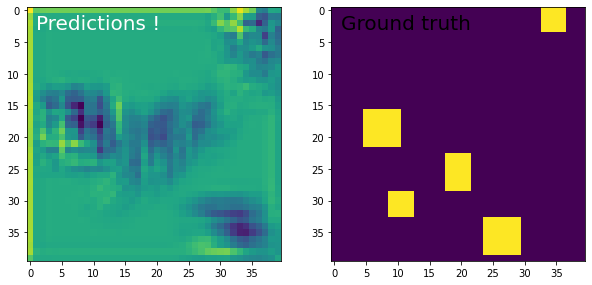

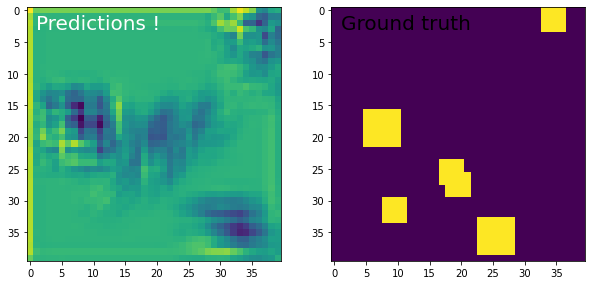

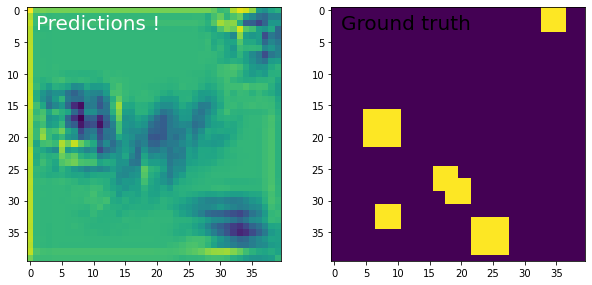

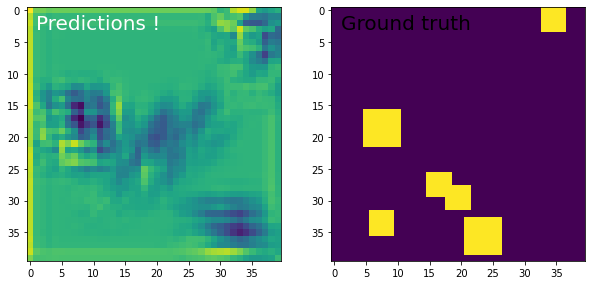

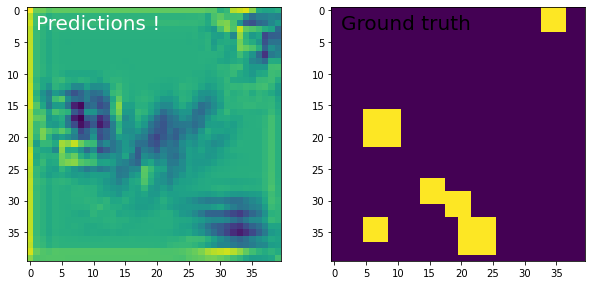

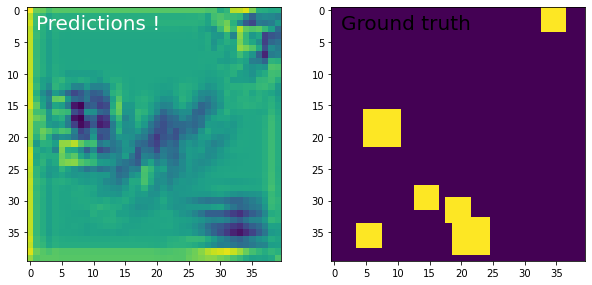

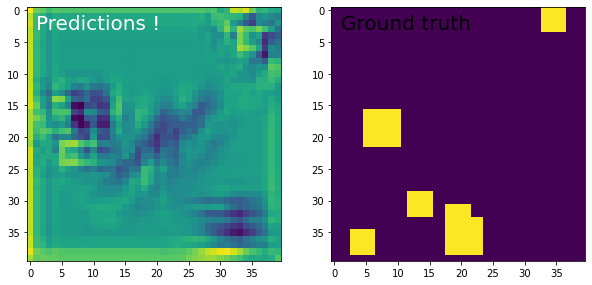

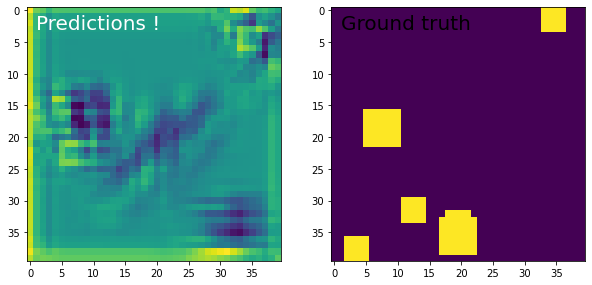

In [6]:
""" This script demonstrates the use of a convolutional LSTM network.
This network is used to predict the next frame of an artificially
generated movie which contains moving squares.
"""
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt
from keras import backend as K

if K.backend() == 'mxnet':
    raise NotImplementedError("MXNet Backend: ConvLSTM2D Layer is not supported yet.")

# We create a layer which take as input movies of shape
# (n_frames, width, height, channels) and returns a movie
# of identical shape.

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

'''
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())
'''

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')


# Artificial data generation:
# Generate movies with 3 to 7 moving squares inside.
# The squares are of shape 1x1 or 2x2 pixels,
# which move linearly over time.
# For convenience we first create movies with bigger width and height (80x80)
# and at the end we select a 40x40 window.

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10,
        epochs=3, validation_split=0.05)

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

### 【問題2】（アドバンス課題）複数のデータセット間での比較
他のデータセットでも実験を行なってください。

データセット - Keras Documentation
https://keras.io/ja/datasets/#_5

Kerasで簡単に利用できる自然言語データセットとしてロイターのニュースワイヤー トピックス分類があります。

### 【問題3】他のクラスの説明
ドキュメントには他にも関連するクラスが記載されています。それらがどういうものなのかを説明してください。この中には実際に扱うことは少ないクラスも含まれています。

* RNN ・・・Recurrentレイヤーに対する基底クラス  
  
* SimpleRNNCell ・・・SimpleRNNのCellクラス．  
  
* GRUCell ・・・GRUレイヤーのためのCellクラス．  
  
* LSTMCell ・・・LSTMレイヤーのためのcellクラス．  
  
* StackedRNNCells ・・・RNN cellのスタックの振る舞いを単一のcellのようにするためのラッパー．効率的なstacked RNNを実装するために使われる．  
  
* CuDNNGRU ・・・CuDNNを利用した高速なGRU実装．TensorFlowバックエンドでGPU上でのみ動作．  
  
* CuDNNLSTM ・・・CuDNNを利用した高速なLSTM実装．TensorFlowバックエンドでGPU上でのみ動作．